<a href="https://colab.research.google.com/github/grettynazario/TP1-orgaDatos/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolución de Trabajo Práctico

## Instalación

In [110]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u252-b09-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


## Carga de datos e imports

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Load the Data and take a quick look.
url = 'https://raw.githubusercontent.com/grettynazario/TP1-orgaDatos/master/train.csv'
tweets = pd.read_csv(url, encoding='latin-1')


#Análisis inicial
##Analizando tweets con y sin ubicación

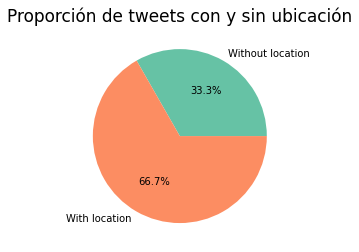

In [113]:
tweets_without_loc = tweets.location.isnull().sum()
tweets_with_loc = tweets.location.size - tweets_without_loc

values = [tweets_without_loc, tweets_with_loc]
x = ['Without location','With location']
plt.pie(values, labels=x, autopct='%0.1f%%')
plt.title('Proporción de tweets con y sin ubicación', fontsize=17)
plt.show()

## Analizando tweets con keywords

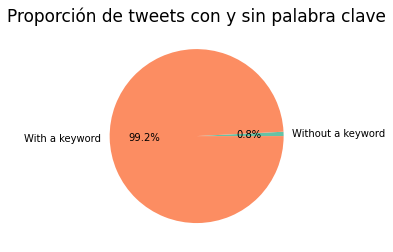

In [114]:
tweets_without_keyw = tweets.keyword.isnull().sum()
tweets_with_keyw = tweets.keyword.size - tweets_without_keyw

values = [tweets_without_keyw, tweets_with_keyw]
x = ['Without a keyword','With a keyword']
plt.pie(values, labels=x, autopct='%0.1f%%')
plt.title('Proporción de tweets con y sin palabra clave', fontsize=17)
plt.show()

##Tweets verdaderos vs. tweets falsos


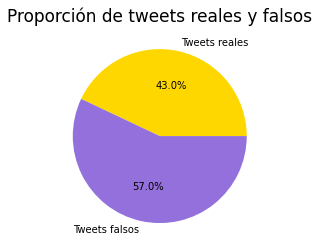

In [115]:
tweets_reales_count = tweets[tweets.target == 1].shape[0]
tweets_falsos_count = tweets[tweets.target == 0].shape[0]

values = [tweets_reales_count, tweets_falsos_count]
x = ['Tweets reales','Tweets falsos']
plt.pie(values, labels=x, autopct='%0.1f%%', colors=['gold','mediumpurple'])
plt.title('Proporción de tweets reales y falsos', fontsize=17)
plt.show()

#Análisis del data set teniendo en cuenta los nulls

In [0]:
#Completo los NaN correspondientes a las columnas de keyword y location 
values = {'keyword':'No keyword' , 'location':'No location'}
tweets.fillna(value=values, inplace=True)

### **Analizando tweets por Keyword**

Comparamos la cantidad de veces que aparecen las keywords en el dataset en general.

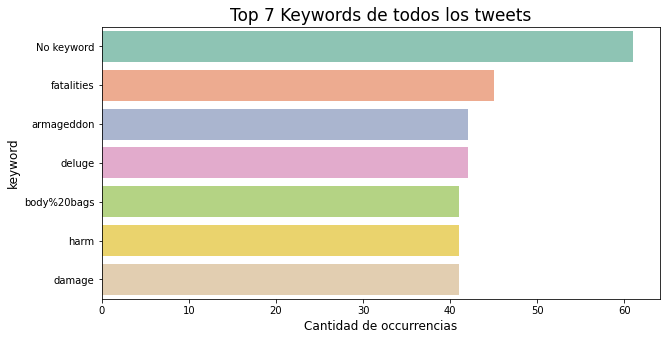

In [117]:
keyword_count  = tweets['keyword'].value_counts()
keyword_count = keyword_count[:7,]

#Visualización
plt.figure(figsize=(10,5))
sns.barplot(keyword_count.values, keyword_count.index, alpha=0.8)
plt.title('Top 7 Keywords de todos los tweets', fontsize=17)
plt.xlabel('Cantidad de occurrencias', fontsize=12)
plt.ylabel('keyword', fontsize=12)
plt.show()

### **Analizando tweets veridicos por keywords**
comparamos las keywords que más ocurrencias tienen y además son verdaderas según lo dice la columna target. 

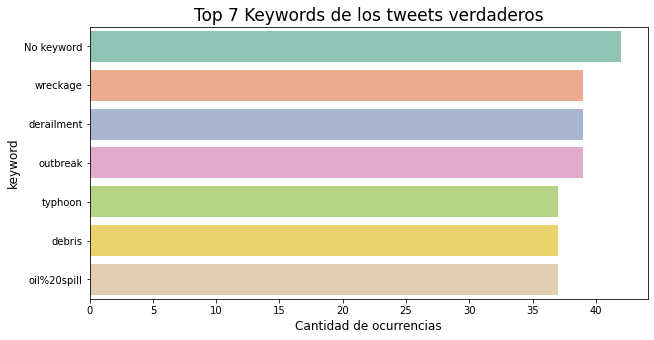

In [118]:
real_tweets = tweets[tweets.target == 1]
real_keyword_count  = real_tweets['keyword'].value_counts()
real_keyword_count = real_keyword_count[:7,]

#Visualización
plt.figure(figsize=(10,5))
sns.barplot(real_keyword_count.values, real_keyword_count.index, alpha=0.8)
plt.title('Top 7 Keywords de los tweets verdaderos', fontsize=17)
plt.xlabel('Cantidad de ocurrencias', fontsize=12)
plt.ylabel('keyword', fontsize=12)
plt.show()

### **Analizando tweets por ubicación**

Haremos un análisis similar al realizado con la columna keyword pero ahora con la ubicación de los tweets. Vamos a ver cuáles son **las 7 ubicaciones con más ocurrencia en el dataset en general**.

Text(0.5, 1.0, 'Top 7 de ubicaciones de todos los tweets')

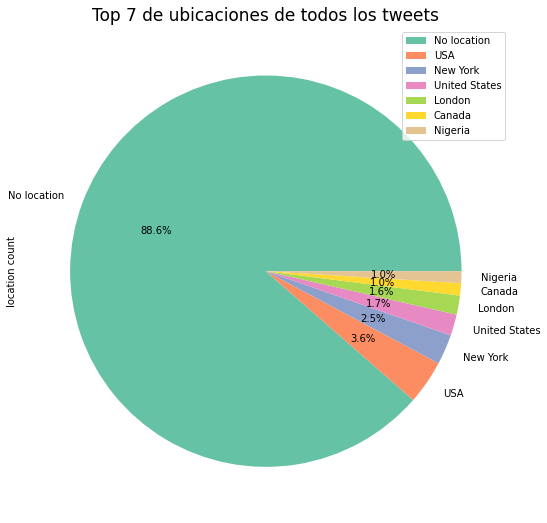

In [119]:
location_count  = tweets['location'].value_counts()
location_count = location_count[:7,]
#Visualización
loc_df = location_count.to_frame(name='location count')
plot = loc_df.plot.pie(y='location count', figsize=(9,9), autopct='%0.1f%%')
plot.set_title("Top 7 de ubicaciones de todos los tweets", fontsize=17)


### **Analizamos tweets veridicos por ubicación**

Haremos lo mismo en el subconjunto de tweets reales. **Top 7**


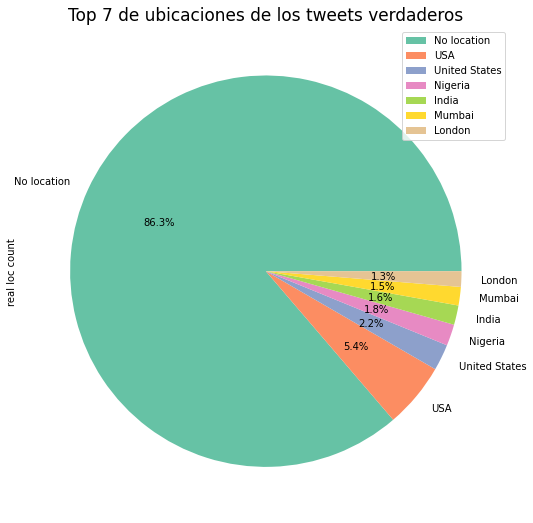

In [120]:
real_location_count  = real_tweets['location'].value_counts()
real_location_count = real_location_count[:7,]
#Visualización
pp = real_location_count.to_frame(name='real loc count').plot.pie(y='real loc count', figsize=(9,9), autopct='%0.1f%%')
pp.set_title("Top 7 de ubicaciones de los tweets verdaderos", fontsize=17)

plt.show(plot, pp)

###¿Top 7 de ubicaciones no son mentirosos?
A través del pie plot no se puede apreciar mucho la participación de las otras ubicaciones, entonces vamos a ver el top 7 de ubicaciones y además, ya que sabemos que estas 7 ubicaciones son las que más tweets reales tienen, queremos analizar que relación hay entre los tweets verdaderos o falsos del total provenientes de aquellas. Para esto, utilizamos una visualización de doble barra. 

In [0]:
#Real tweets top 7
real_tweets_top_seven = real_location_count.to_frame().reset_index()
real_tweets_top_seven.rename(columns= {'location':'real tweets', 'index': 'location'}, inplace = True)
#No location deleted
real_tweets_top_seven.drop(real_tweets_top_seven[real_tweets_top_seven['location'] == 'No location'].index, inplace = True)
#False tweets count
false_tweets = tweets[tweets.target == 0]
count_false_tweets = false_tweets['location'].value_counts().to_frame().reset_index()
count_false_tweets.rename(columns = {'location':'false tweets', 'index':'location'}, inplace = True)

In [0]:
#Merge 
top_seven_by_location = pd.merge(real_tweets_top_seven, count_false_tweets, how= 'inner', on = 'location' )
top_seven_by_location.set_index('location', inplace = True)

Text(0, 0.5, 'Cantidad de tweets')

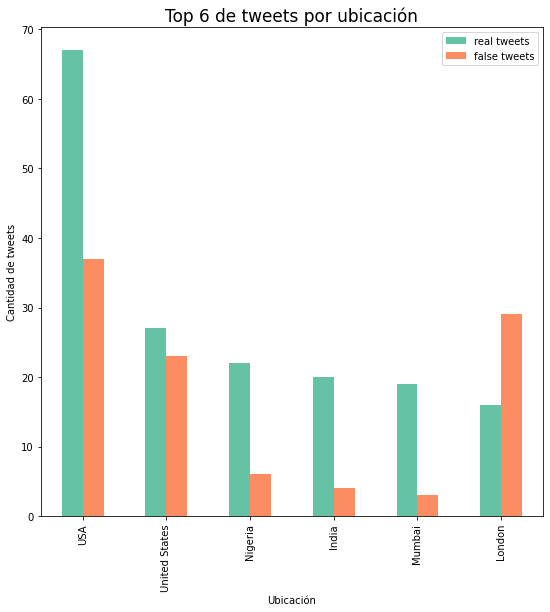

In [123]:
#Visualización top 7 de ubicaciones:
top_seven_by_location.plot(kind= 'bar',figsize=(9,9))
plt.title('Top 6 de tweets por ubicación', fontsize=17)
plt.xlabel('Ubicación')
plt.ylabel('Cantidad de tweets')

Se puede observar en la visualización del top 7  que USA posee la mayor cantidad de tweets catastróficos falsos y tambien la mayor cantidad de tweets catastróficos verdaderos.

## ¿Los tweets más largos son verdaderos?


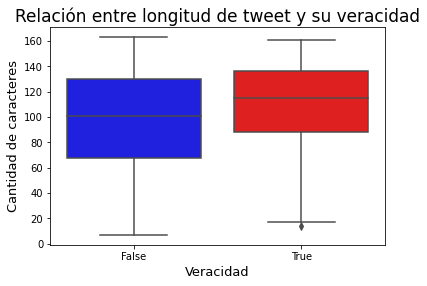

In [124]:
#Agrego columnas que tengan los valores del largo de los tweets y para cada uno, si es verdadero o no:

tweets['tweet_length'] = tweets['text'].str.len()
tweets['veracity'] = (tweets.target == 1)

sns.set_palette("Set2")
bplot = sns.boxplot(x='veracity', y='tweet_length', data=tweets, palette=['blue','red'])

bplot.set_xlabel("Veracidad", fontsize=13)
bplot.set_ylabel("Cantidad de caracteres", fontsize=13)
plt.title('Relación entre longitud de tweet y su veracidad', fontsize=17)
bplot.tick_params(labelsize=10)

 ## **Análisis del texto de los tweets**

 ### **Analizando los textos por caracteres especiales**

In [0]:
def contador_de_caracter(caracter, texto):
  contador = 0
  for letra in texto:
    if(letra == caracter):
      contador = contador + 1
  return contador

## **Analizamos por el caracter típico del hashtag ' # '**

In [0]:
#Se crea un df con las cantidades del caracter '#' por cada tweet
textos = tweets.text
caracteres = textos.apply(lambda x: contador_de_caracter('#',x))
caracteres = caracteres.to_frame()
caracteres.rename(columns = {'text':'caracter'}, inplace = True)
cantidad_caracter = caracteres.caracter
df_caracteres_texts = pd.concat([textos, cantidad_caracter], axis = 1)

In [0]:
#df con los tweets reales
df_caracteres_texts = pd.merge(df_caracteres_texts, tweets, how='inner')
df_caracteres_real = df_caracteres_texts[df_caracteres_texts.target == 1]
df_caracteres_real = df_caracteres_real.groupby('caracter').agg({'target':'count'}).reset_index()
df_caracteres_real.rename(columns={'target':'tweets reales'}, inplace=True)

In [0]:
#df con los tweets falsos
df_caracteres_texts = pd.merge(df_caracteres_texts, tweets, how='inner')
df_caracteres_falso = df_caracteres_texts[df_caracteres_texts.target == 0]
df_caracteres_falso = df_caracteres_falso.groupby('caracter').agg({'target':'count'}).reset_index()
df_caracteres_falso.rename(columns={'target':'tweets falsos'}, inplace=True)

<Figure size 720x360 with 0 Axes>

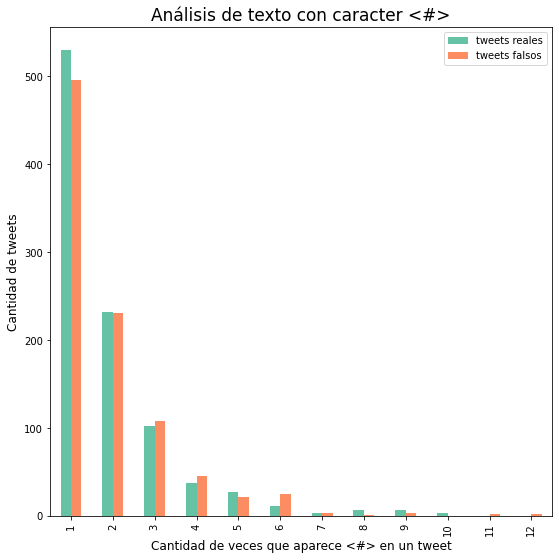

In [129]:
#Merge
hashtag_count = pd.merge(df_caracteres_real, df_caracteres_falso, how ='outer', on = 'caracter') 
hashtag_count = hashtag_count.drop([0], axis=0)
del hashtag_count['caracter'] 

plt.figure(figsize=(10,5))
hashtag_count.plot(kind= 'bar',figsize=(9,9))
plt.xlabel('Cantidad de veces que aparece <#> en un tweet', fontsize=12)
plt.ylabel('Cantidad de tweets', fontsize=12)
plt.title('Análisis de texto con caracter <#>', fontsize=17)
plt.show()

## **Analizamos por el caracter ' ! '**

In [0]:
#Se crea un df con las cantidades de caracteres por cada texto
textos = tweets.text
caracteres = textos.apply(lambda x: contador_de_caracter('!',x))
caracteres = caracteres.to_frame()
caracteres.rename(columns = {'text':'caracter'}, inplace = True)
cantidad_caracter = caracteres.caracter
df_caracteres_texts = pd.concat([textos, cantidad_caracter], axis = 1)

In [0]:
#df con los tweets reales
df_caracteres_texts = pd.merge(df_caracteres_texts, tweets, how='inner')
df_caracteres_real = df_caracteres_texts[df_caracteres_texts.target == 1]
df_caracteres_real = df_caracteres_real.groupby('caracter').agg({'target':'count'}).reset_index()
df_caracteres_real.rename(columns={'target':'tweets reales'}, inplace=True)

In [0]:
#df con los tweets falsos
df_caracteres_texts = pd.merge(df_caracteres_texts, tweets, how='inner')
df_caracteres_falso = df_caracteres_texts[df_caracteres_texts.target == 0]
df_caracteres_falso = df_caracteres_falso.groupby('caracter').agg({'target':'count'}).reset_index()
df_caracteres_falso.rename(columns={'target':'tweets falsos'}, inplace=True)

<Figure size 720x360 with 0 Axes>

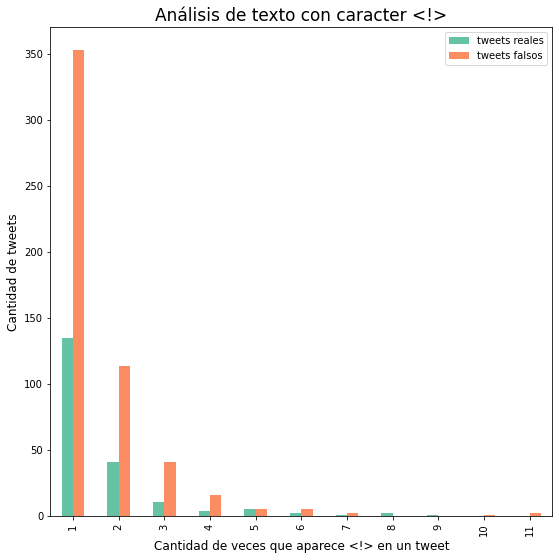

In [133]:
#Merge
signo_admiracion_count = pd.merge(df_caracteres_real, df_caracteres_falso, how='outer', on = 'caracter') 

signo_admiracion_count = signo_admiracion_count.drop([0], axis=0)
del signo_admiracion_count['caracter'] 

plt.figure(figsize=(10,5))
signo_admiracion_count.plot(kind= 'bar',figsize=(9,9))
plt.xlabel('Cantidad de veces que aparece <!> en un tweet', fontsize=12)
plt.ylabel('Cantidad de tweets', fontsize=12)
plt.title('Análisis de texto con caracter <!>', fontsize=17)
plt.show()

###WordCloud de tweets reales y falsos

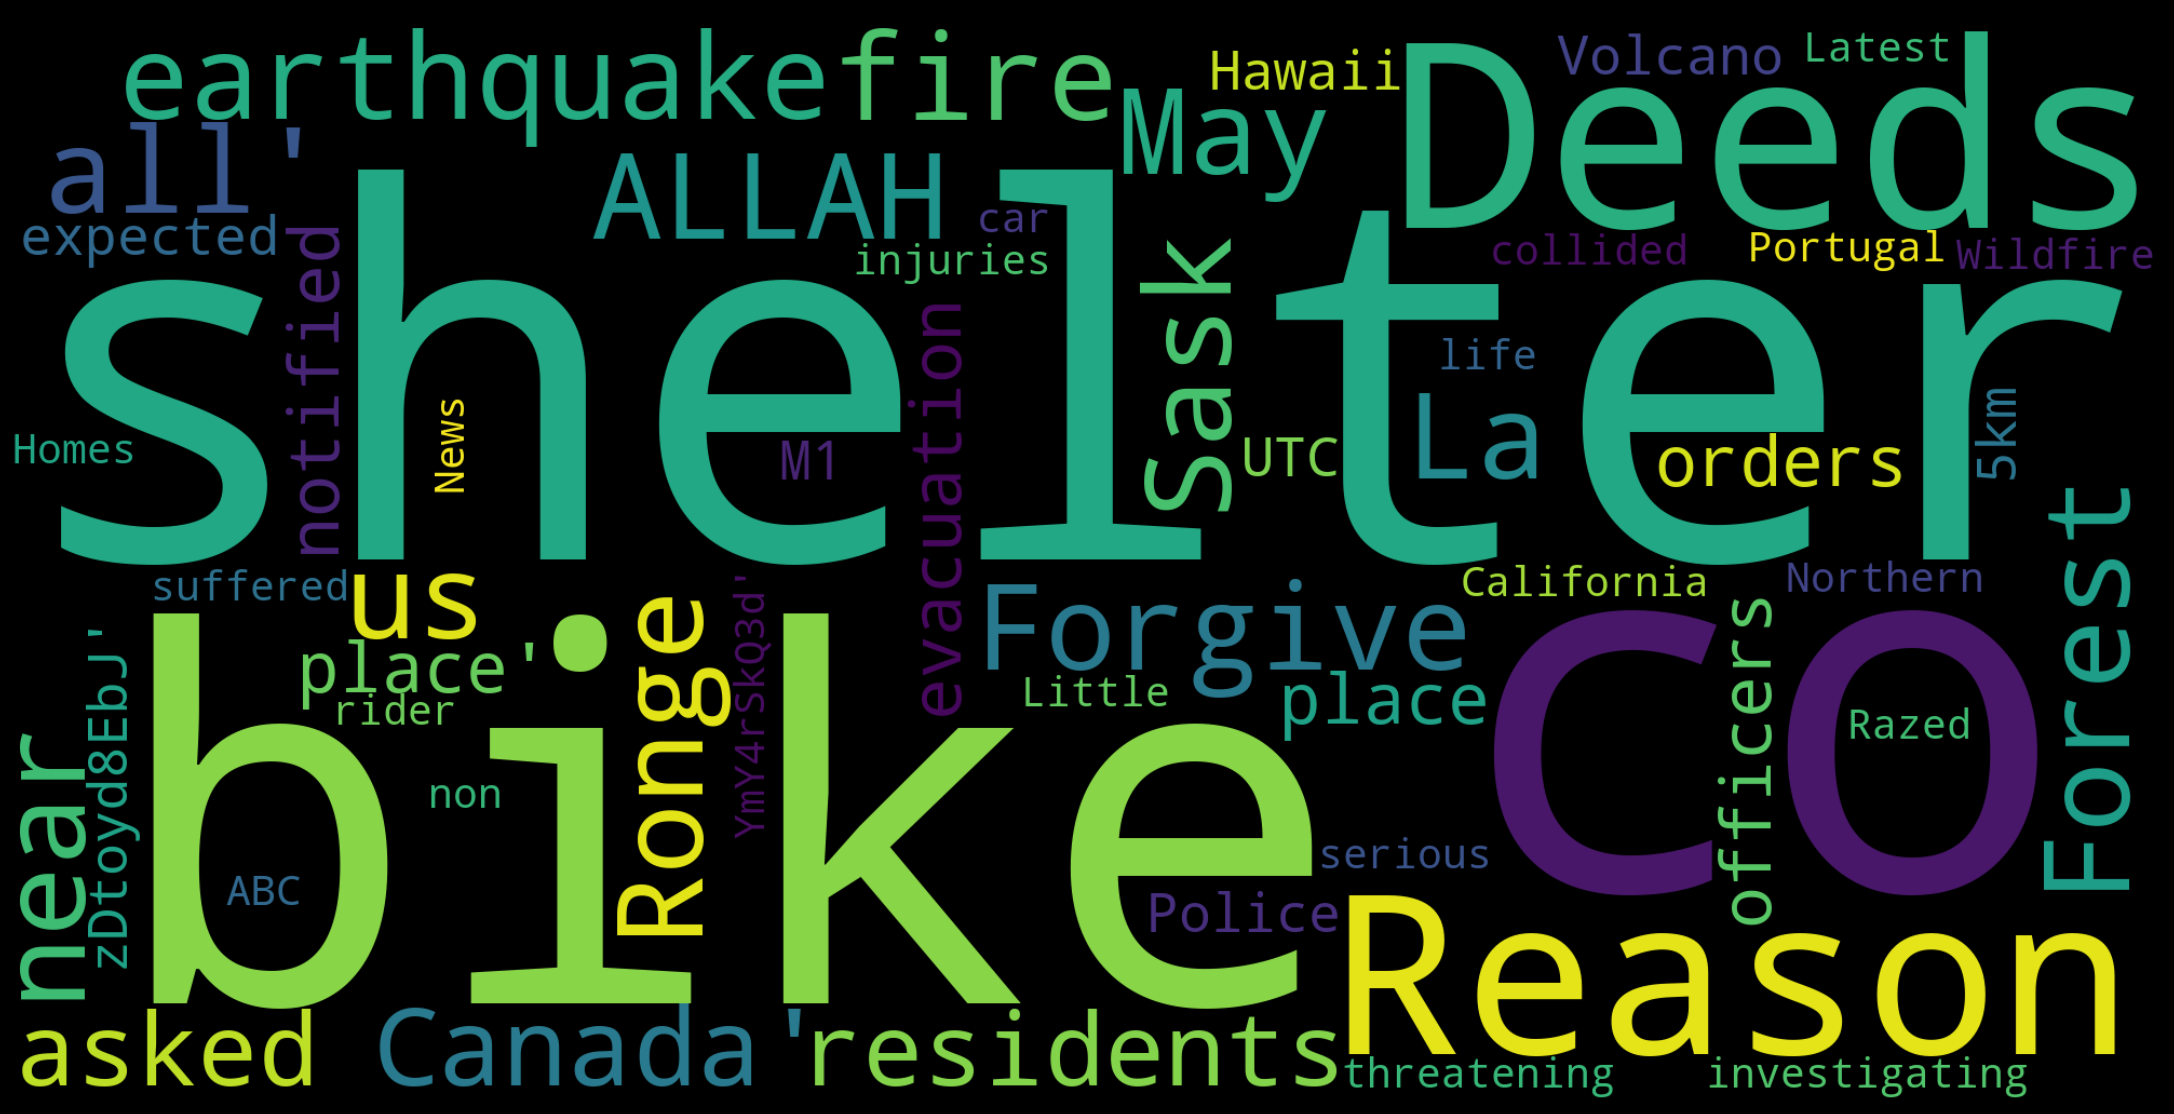

In [134]:
from wordcloud import WordCloud, STOPWORDS

#Recordamos que tenemos los df de tweets reales y falsos

#WordCloud de tweets reales 
text_from_real_tweets = real_tweets.text.values
wordcloud1 = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text_from_real_tweets))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WordCloud de tweets reales', fontsize=17)
plt.show()

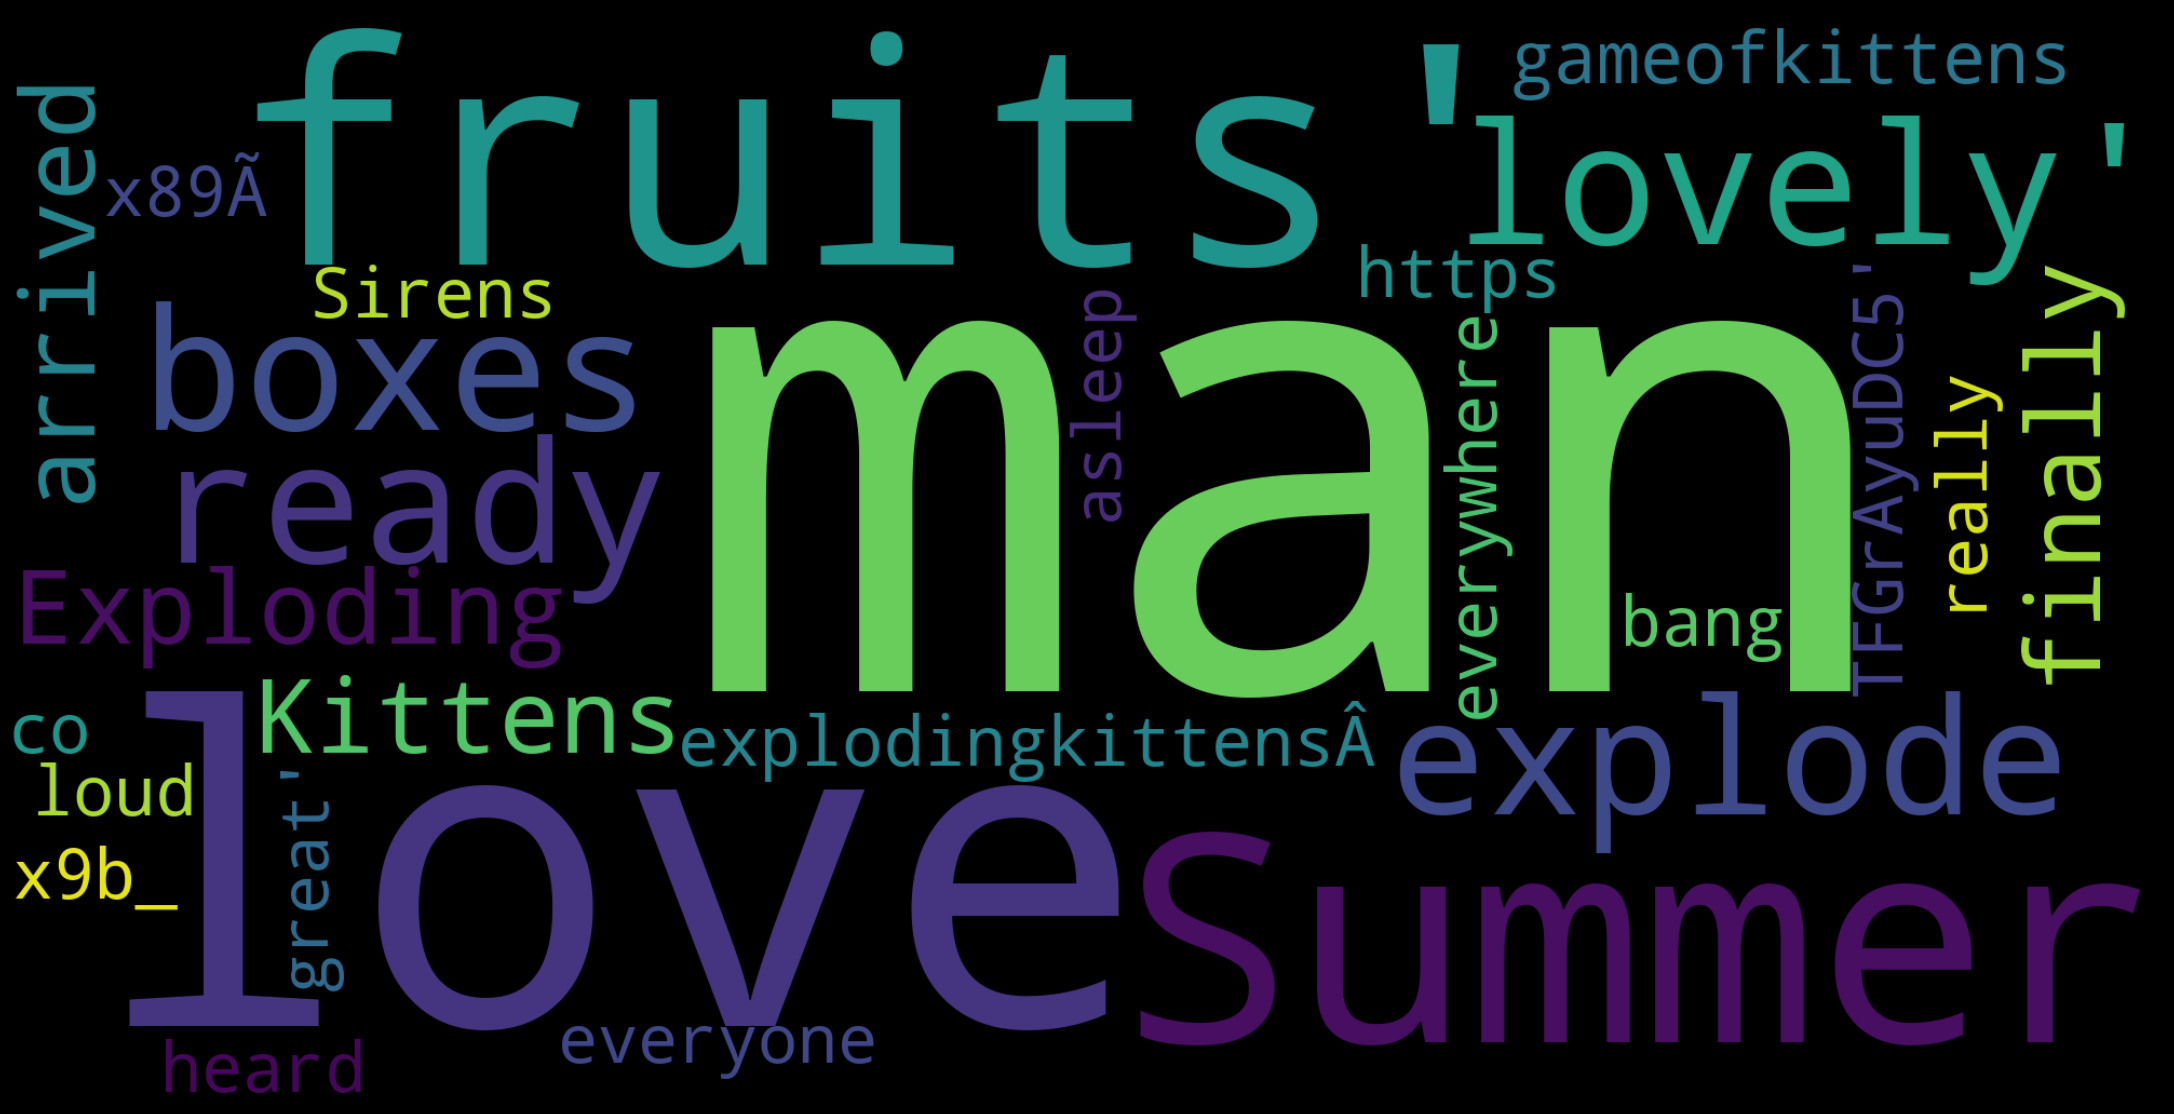

In [135]:
#WordCloud de tweets falsos
text_from_false_tweets = false_tweets.text.values
wordcloud2 = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text_from_false_tweets))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('WordCloud de tweets falsos', fontsize=17)
plt.show()